# Analisis Dataset Iris

_Dataset Iris_ merupakan salah satu dataset yang disediakan oleh [scikit-learn](https://scikit-learn.org/) atau sklearn yang berisi kumpulan data klasifikasi tanaman iris. _Dataset_ tersebut memiliki ciri-ciri atau fitur yang meliputi panjang kelopak bunga (_sepal length_), lebar kelopak bunga (_sepal width_), panjang daun bunga (_petal length_), lebar daun bunga (_petal width_) dan kelas (_class_) yang mengelompokan tanaman iris tersebut. Kelas-kelas yang terdapat pada dataset diantaranya _Iris-Setosa_, _Iris-Versicolour_ dan _Iris-Virginica_.
Dataset Iris ini merupakan dataset yang ditemukan pada makalah (_paper_) yang ditulis oleh *Sir R.A. Fisher* yang berjudul "_The use of multiple measurements in taxonomic problems_" pada tahun 1950. [[1]](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset)

## Memuat Dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True).frame

iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
131,7.9,3.8,6.4,2.0,2
94,5.6,2.7,4.2,1.3,1
29,4.7,3.2,1.6,0.2,0
141,6.9,3.1,5.1,2.3,2
76,6.8,2.8,4.8,1.4,1


## Informasi Data

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Pada informasi data diatas, disimpulkan bahwa:
- terdapat `150` baris dan `5` kolom data.
- tidak terdapat data kosong pada seluruh kolom atau fitur.
- terdapat `4` fitur angka riil, dan `1` fitur angka bulat.

## Pemrosesan Data Pra-Analisis

### Mengetahui Nilai Kosong

In [5]:
iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Pada informasi diatas, disimpulkan bahwa tidak ada data kosong pada setiap fitur.

### Mengetahui Data Ganda 

#### Cek Data Ganda

In [8]:
iris.duplicated().sum()

1

Terdapat `1` buah data yang ganda.

#### Menampilkan Data Ganda

In [22]:
iris.loc[iris.duplicated(keep=False), :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


Data ganda terdapat pada indeks `101` dan `142`

#### Menghapus Data Ganda

In [23]:
iris.drop_duplicates(inplace=True)

#### Cek Data Ganda Dengan Subset Tanpa Target

In [28]:
predictor_columns = iris.loc[:, ~iris.columns.isin(['target'])].columns.to_list()
iris.duplicated(subset=predictor_columns).sum()

0

## Analisis Eksplorasi Data

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')

### Statistika Deskriptif

In [41]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Analisis Univariat (Satu Variabel)

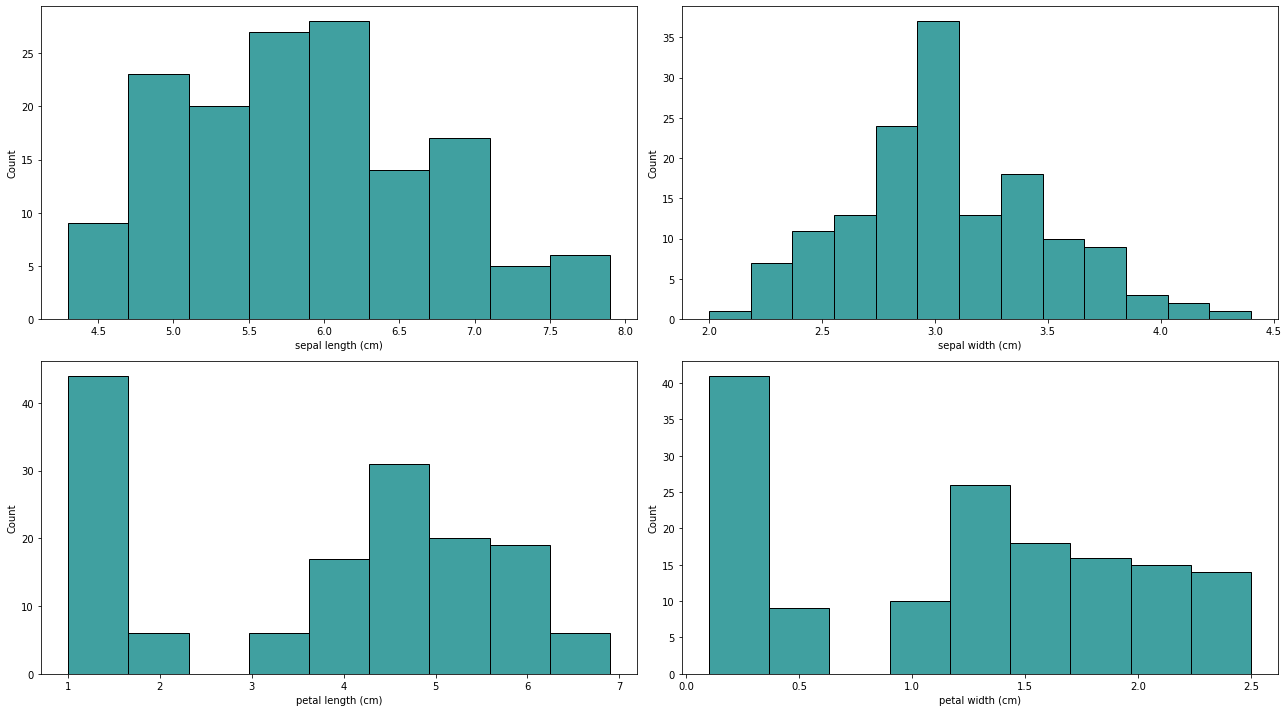

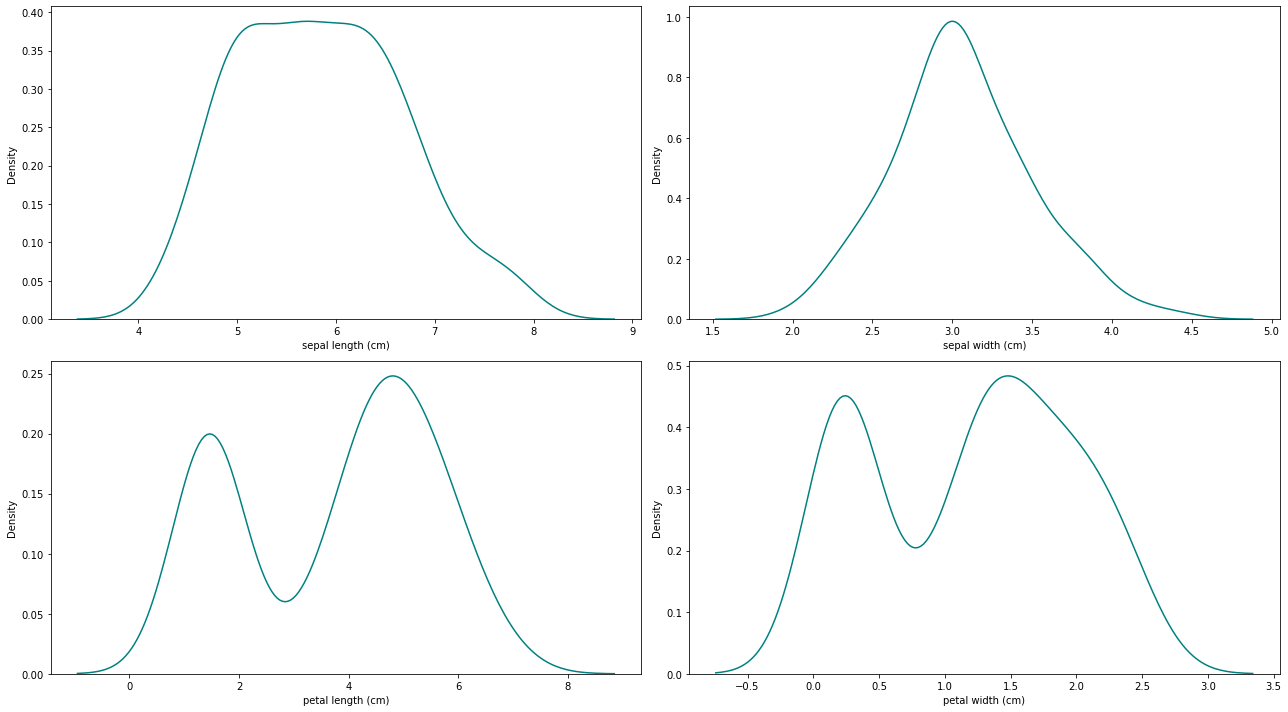

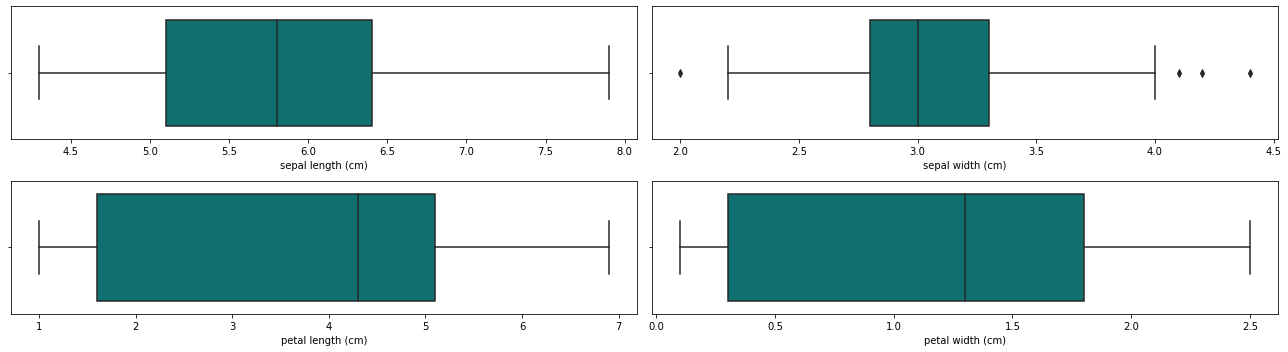

In [60]:
predictor_columns = iris.loc[:, ~iris.columns.isin(['target'])].columns.to_list()

# histogram
plt.figure(figsize=(18, 10))
for index in range(0, len(predictor_columns)):
    plt.subplot(len(predictor_columns)/2, len(predictor_columns)/2, index+1)
    sns.histplot(x=iris[predictor_columns[index]], color='teal', data=iris)
    plt.tight_layout()
plt.show();

# kdeplot
# TODO: add vertical line at the center of each plot
plt.figure(figsize=(18, 10))
for index in range(0, len(predictor_columns)):
    plt.subplot(len(predictor_columns)/2, len(predictor_columns)/2, index+1)
    sns.kdeplot(x=iris[predictor_columns[index]], color='teal', data=iris)
    plt.tight_layout()
plt.show();

# boxplot
plt.figure(figsize=(18, 5))
for index in range(0, len(predictor_columns)):
    plt.subplot(len(predictor_columns)/2, len(predictor_columns)/2, index+1)
    sns.boxplot(x=iris[predictor_columns[index]], color='teal', orient='v', data=iris)
    plt.tight_layout()
plt.show();

- Terdapat `outlier` pada fitur `sepal width`

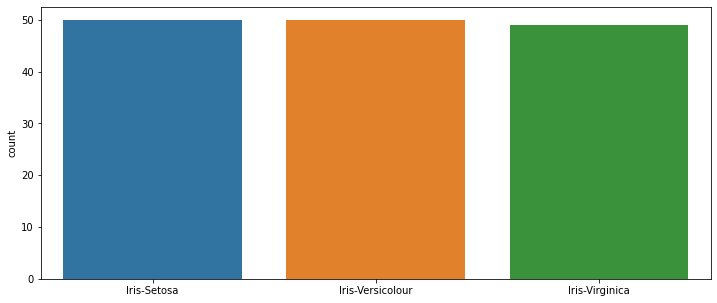

In [82]:
class_map = {
    0: 'Iris-Setosa',
    1: 'Iris-Versicolour',
    2: 'Iris-Virginica',
}

plt.figure(figsize=(12, 5))
sns.countplot(x='target', data=iris)
plt.xticks(list(class_map.keys()), list(class_map.values()))
plt.xlabel('')
plt.show();